In [6]:
#imports
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from ema_workbench import (Model, CategoricalParameter,ScalarOutcome, IntegerParameter, RealParameter,
                           MultiprocessingEvaluator, ema_logging, Constant, Policy, Scenario,
                           perform_experiments, SequentialEvaluator,Constraint)
from problem_formulation import get_model_for_problem_formulation

from dike_model_function import DikeNetwork  # @UnresolvedImport

from ema_workbench.em_framework.optimization import (HyperVolume, EpsilonProgress,GenerationalBorg)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
from ema_workbench.analysis import plotting, plotting_util, parcoords, feature_scoring, prim

import time
import copy

In [4]:
#running the model through EMA workbench
ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

with SequentialEvaluator(dike_model) as evaluator:
    results_s100_p5 = evaluator.perform_experiments(scenarios=100, policies=5)

[MainProcess/INFO] performing 100 scenarios * 5 policies * 1 model(s) = 500 experiments
100%|████████████████████████████████████████| 500/500 [10:44<00:00,  1.29s/it]
[MainProcess/INFO] experiments finished


In [8]:
experiments_s100_p5, outcomes_s100_p5 = results

In [9]:
fd = pd.DataFrame(experiments_s100_p5)

In [10]:
fd

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,112,323.708779,10,0.191868,332.742252,1.5,0.062708,330.894115,10,0.565117,...,6,1,5,10,6,10,3,5,0,dikesnet
1,119,332.379847,1.5,0.979213,242.518017,10,0.055427,226.772952,10,0.922442,...,6,1,5,10,6,10,3,6,0,dikesnet
2,97,62.950705,1.0,0.430539,200.850935,1.5,0.778816,81.494920,10,0.551829,...,6,1,5,10,6,10,3,7,0,dikesnet
3,59,124.877257,10,0.982221,257.153255,1.0,0.192130,51.976128,1.5,0.037548,...,6,1,5,10,6,10,3,8,0,dikesnet
4,62,309.441917,1.0,0.595159,348.115132,10,0.086232,134.021180,10,0.692603,...,6,1,5,10,6,10,3,9,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85,304.778061,10,0.401373,194.560960,1.5,0.714213,98.528826,1.5,0.265422,...,3,5,3,7,5,2,2,100,4,dikesnet
496,105,269.962144,10,0.105057,320.405615,10,0.010768,279.173964,10,0.202115,...,3,5,3,7,5,2,2,101,4,dikesnet
497,79,85.270727,1.5,0.628527,346.748258,1.5,0.561656,231.511313,10,0.871133,...,3,5,3,7,5,2,2,102,4,dikesnet
498,5,49.880541,10,0.030452,233.470954,10,0.075280,32.716487,1.5,0.214327,...,3,5,3,7,5,2,2,103,4,dikesnet


In [16]:
for outcome in outcomes_s100_p5.keys():
    fd[outcome] = outcomes_s100_p5[outcome]

In [17]:
fd.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model', 'A.4 Total Costs',
       'A.4_Expected Number of Deaths', 'RfR Total Costs',
       'Exp

In [18]:
fd.to_csv("results.csv") 

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


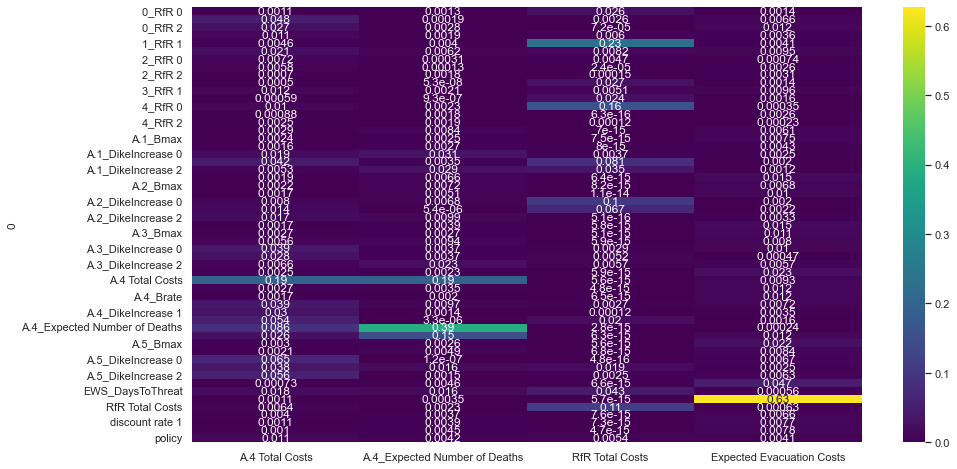

In [19]:
x = experiments_s100_p5.copy()
y = outcomes_s100_p5.copy()

fs = feature_scoring.get_feature_scores_all(x, y)

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

In [21]:
x.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model', 'A.4 Total Costs',
       'A.4_Expected Number of Deaths', 'RfR Total Costs',
       'Exp

In [22]:
#running the model through EMA workbench
ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

with SequentialEvaluator(dike_model) as evaluator:
    results_improved = evaluator.perform_experiments(scenarios=100, policies=5)

[MainProcess/INFO] performing 100 scenarios * 5 policies * 1 model(s) = 500 experiments
100%|████████████████████████████████████████| 500/500 [10:44<00:00,  1.29s/it]
[MainProcess/INFO] experiments finished


In [ ]:
experiments_improved, outcomes_improved = results_improved

In [ ]:
outcomes_improved.keys()

In [ ]:
experiments_improved.columns

In [ ]:
experiments_improved[['A.0_ID flood wave shape', 'A.1_Bmax']]

In [ ]:

x = experiments_improved[['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2']].copy()
y = outcomes_improved.copy()

fs = feature_scoring.get_feature_scores_all(x, y)

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

In [ ]:
x = experiments_improved[['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat']].copy()
y = outcomes_improved.copy()

fs = feature_scoring.get_feature_scores_all(x, y)

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

In [ ]:
outcomes_improved.keys()

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(outcomes_improved['A.4 Total Costs'], experiments_improved['A.4_pfail'], c=experiments_improved['policy'])
plt.colorbar(sc)

ax.set_xlabel('A.4 Total Costs')
ax.set_ylabel('A.4_pfail')
plt.show()

In [ ]:
experiments_improved.columns

In [ ]:
experiments_improved[experiments_improved['policy'] == 4][['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat']].iloc[0]

In [ ]:
experiments_improved[experiments_improved['policy'] == 5][['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat']].iloc[0]

## Explore effects of Levers

In [ ]:
ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

with SequentialEvaluator(dike_model) as evaluator:
    results_s1_p500 = evaluator.perform_experiments(scenarios=1, policies=500)

In [ ]:
experiments_levers, outcomes_levers = results_levers
x = experiments_levers[['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat']].copy()
y = outcomes_levers.copy()

fs = feature_scoring.get_feature_scores_all(x, y)

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

In [ ]:
y_transformed = pd.DataFrame()
for keys in y.keys():
    y_transformed[keys] = y[keys] 

In [ ]:
y_transformed['RfR Total Costs'].quantile()

In [ ]:
y_transformed['of_interest'] = y_transformed['RfR Total Costs'] < 1051100000.0

In [ ]:
y_transformed['of_interest']

In [ ]:
x = experiments_improved[['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2']].copy()

In [ ]:
y.keys()

In [ ]:

prim_alg = prim.Prim(x, y_transformed['of_interest'], threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()
n=10
box1.show_tradeoff()
#print(box1.resample(n))
box1.inspect(n)
box1.inspect(n, style="graph")
box1.show_pairs_scatter(n)

plt.show()

## Choose Policies

In [ ]:
policies = [Policy('policy 1', **{'0_RfR 0':1,
                                  '0_RfR 1':1,
                                  '0_RfR 2':1,
                                  'A.1_DikeIncrease 0':5}),
           Policy('policy 2', **{'4_RfR 0':1,
                                  '4_RfR 1':1,
                                  '4_RfR 2':1,
                                  'A.5_DikeIncrease 0':5}),
           Policy('policy 3', **{'1_RfR 0':1,
                                  '2_RfR 1':1,
                                  '3_RfR 2':1,
                                  'A.3_DikeIncrease 0':5})]